# CMS och Open Data

I CERNs CMS-projekt låter man protoner kollidera och undersöker vilka partiklar som bildas i kollisionerna. Från dessa kollisioner samlar man upp stora mängder data, som publiceras öppet på [CERNs OpenData-portal](https://opendata.cern.ch/). I denna övning ska vi se på vad dessa datasets innehåller och vad man kan lära sig genom dem. Detta ger eleverna möjlighet att pröva på verkliga vetenskapliga metoder med autentiska mätvärden.

## 1. Hämta Data

Vi börjar med att hämta in datasets. Datan har laddats in från CERNs OpenData-portal och sparats i samma mapp som denna Notebook, för att göra det enkelt att läsa in den i detta dokument. Vi undersöker datafilen **Dimuon_DoubleMu.csv**, som innehåller data från *de kollisioner som har producerat två myoner*.

In [1]:
# Vi börjar med att importera funktionspaketen som behövs med hjälp av import-kommandot
# Denna cell måste köras för att resten av koden ska fungera. Tryck Ctrl+Enter för att köra.

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Vi läser in filen och sparar den med variabelnamnet tvillingmyoner

tvillingmyoner = pd.read_csv('Dimuon_DoubleMu.csv')

In [6]:
# Vi tar en titt på tabellen.

tvillingmyoner.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


I tabellen finns mycket information. Varje rad motsvarar en kollision som har producerat två myoner, och båda myonernas egenskaper syns i tabellen. Exempelvis **E1** och **E2** står för myonernas energier, och **p** står för rörelsemängd (anges även i x- y- och z-led). Den sista kolumnen, **M**, innehåller myonernas invarianta massa, som vi ska se mer noggrannt på.

In [7]:
# Vi kontrollerar ur många rader som finns i tabellen

len(tvillingmyoner)

100000

## 2. Invariant massa & histogram

Från tidigare forskning vet vi att många olika partiklar kan sönderfalla till två myoner, och att myonernas invarianta massa kan visa oss vilken ursprungspartikeln är. CMS-detektorn kan mäta myonernas energi och rörelsemängd, och då kan deras invarianta massa beräknas enligt

$M = \sqrt{(E_1 + E_2)^2 - \|\textbf{p}_1 + \textbf{p}_2 \| ^2}$.

Om myonerna uppkom ur en enda partikels sönderfall motsvarar myonernas invarianta massa denna partikels massa. Om myonerna inte uppkommit ur samma partikel säger inte den invarianta massan oss något.

När protonerna kolliderar i partikelacceleratorn frigörs energi, som ger upphov till nya partiklar. En sådan partikel är Z-bosonen, som är väldigt kortlivad, och snabbt sönderfaller till andra partiklar, exempelvis två myoner. Dessa två myoner registreras av partikeldetektorn och när vi beräknar myonernas invarianta massa kan vi se att den motsvarar "moderpartikelns" massa - i detta fall Z-bosonens.

Histogramet är ett utmärkt verktyg för att ge en översikt över resultat från partikelexperiment. Om vi gör ett histogram över de invarianta massorna kan vi urskilja de viktiga händelserna från bakgrundsbruset.

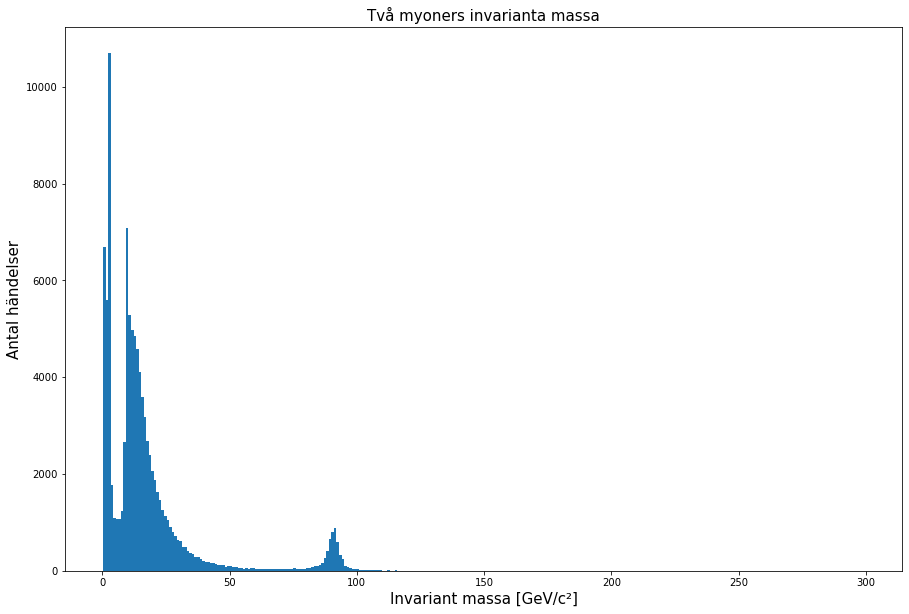

In [8]:
# Den invarianta massan kan beräknas genom formeln ovan, och hittas också i kolumnen 'M' i tabellen.
# Vi sparar kolumnen med den invarianta massorna som en egen variabel.
invariant_massa = tvillingmyoner['M']

# Vi skapar ett histogram över de invarianta massorna med 300 staplar ("bins")
fig = plt.figure(figsize=(15, 10))
plt.hist(invariant_massa , bins=300)

# Här lägger vi till en rubrik och namnger axlarna.
plt.xlabel('Invariant massa [GeV/c²]', fontsize=15)
plt.ylabel('Antal händelser', fontsize=15)
plt.title('Två myoners invarianta massa', fontsize=15)

# Vi visar diagramet.
plt.show()

Vi märker att det finns flera toppar i histogrammet. Varje topp motsvarar massan hos en av de möjliga moderpartiklarna för myonparet. Vi undersöker närmare intervallet med den sista toppen, 80 GeV - 100 GeV.

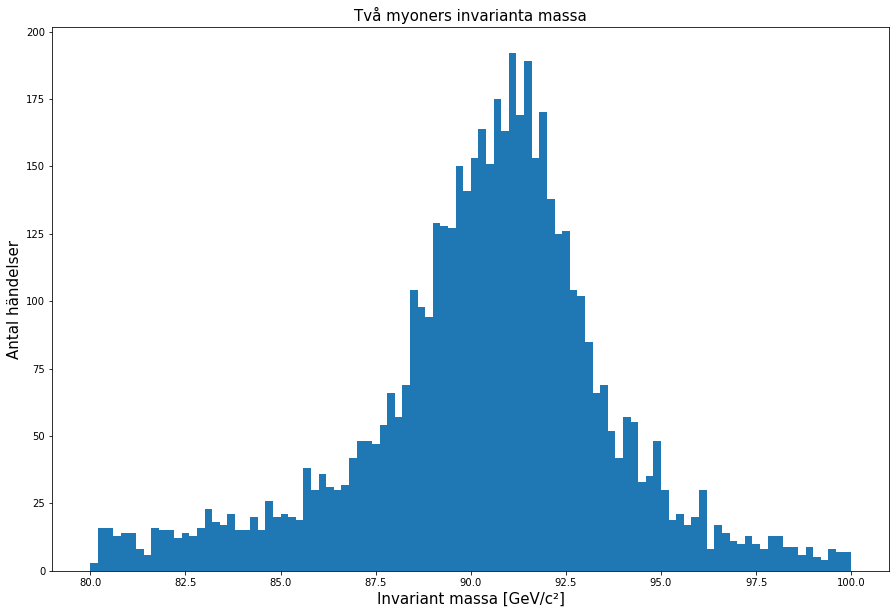

In [9]:
# Vi ritar ett histogram över två myoners invarianta massa med 100 staplar från 80 GeV till 100 GeV.
fig = plt.figure(figsize=(15, 10))
plt.hist(invariant_massa , bins=100, range=(80,100))

# Vi lägger till samma titel och axlar
plt.xlabel('Invariant massa [GeV/c²]', fontsize=15)
plt.ylabel('Antal händelser', fontsize=15)
plt.title('Två myoners invarianta massa', fontsize=15)

plt.show()

Vi märker att datan har en topp vid ungefär 91 GeV, som tydligt skiljer sig ur bakgrundsbruset. Detta tyder på att myonerna uppstår från någon partikel med massan 91 GeV. Den partikeln känner vi som *Z-bosonen*.

Testa själv att söka upp en annan topp ur datan. Motsvarar den en annan partikel? Vilken partikel är det fråga om?

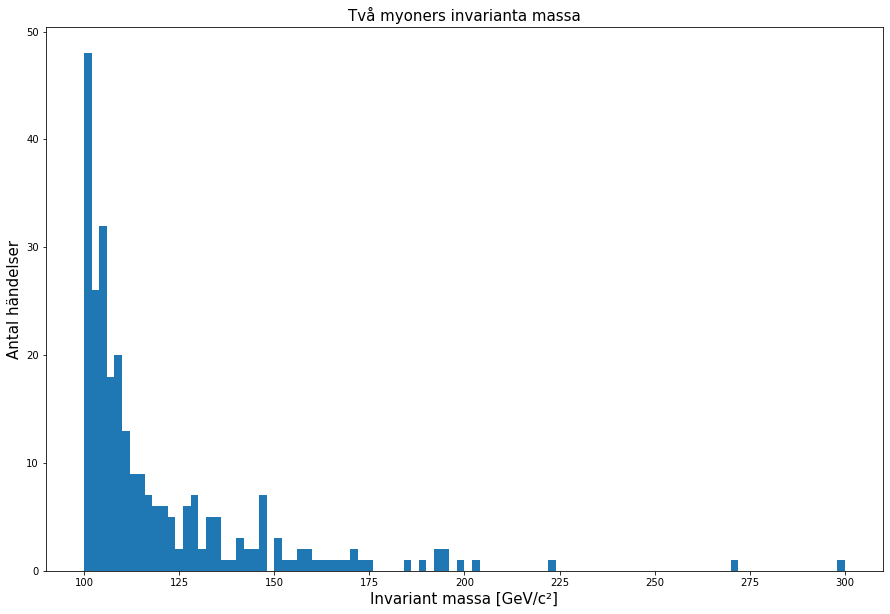

In [12]:
# Vi ritar ett histogram över två myoners invarianta massa med 100 staplar från 80 GeV till 100 GeV.
fig = plt.figure(figsize=(15, 10))
plt.hist(invariant_massa , bins=100, range=(100,300))

# Vi lägger till samma titel och axlar
plt.xlabel('Invariant massa [GeV/c²]', fontsize=15)
plt.ylabel('Antal händelser', fontsize=15)
plt.title('Två myoners invarianta massa', fontsize=15)

plt.show()